In [1]:
# -*- coding: utf-8 -*-
"""
PESCADATA Fish Acoustics: Preliminary Descriptive Data Analysis
Created on Tue Sep 17 08:44:33 2024

@author: jmanitz
"""

'\nPESCADATA Fish Acoustics: Preliminary Descriptive Data Analysis\nCreated on Tue Sep 17 08:44:33 2024\n\n@author: jmanitz\n'

In [2]:
### Load Data ############################################################################################

import numpy as np
import pandas as pd

In [3]:
# import data 
# Source: https://ihma.org.pe/bitacoras-acusticas/
path = "/Users/navne/OneDrive/Desktop/Jule/Documents/climate_projects/ocean_capstone/acoustics_data_2020.csv"
dt = pd.read_csv(path, skipinitialspace=True, delimiter=";", low_memory=False)
dt.columns

Index(['Barco', 'Viaje', 'Region_ID', 'Region_name', 'Region_class',
       'Process_ID', 'Sv_mean', 'NASC', 'Sv_max', 'Sv_min',
       ...
       'Exclude_below_line_depth_max', 'Exclude_below_line_range_max',
       'Samples_Below_Bottom_Exclusion', 'Samples_Above_Surface_Exclusion',
       'Samples_In_Domain', 'Bad_data_empty_water_samples', 'Heave_source',
       'Heave_min', 'Heave_max', 'Heave_mean'],
      dtype='object', length=105)

In [4]:
# Check for relevant variables in the data set; possible response variable
dt[["Region_ID", "Region_class", "Species_name","Species_percent","Species_TS"]].astype('category').describe()

,Region_ID,Region_class,Species_name,Species_percent,Species_TS
count,27392,27392,27392,27392,27392
unique,5600,15,1,1,1
top,86,ANC,Unassigned,100,-40
freq,23,13763,27392,27392,27392


In [5]:
### Descriptive Analysis ############################################################################################

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Frequency of Region_class'}, xlabel='Count', ylabel='Region_class'>

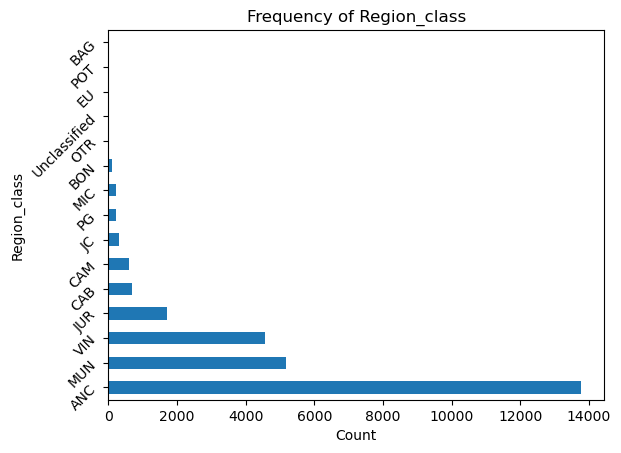

In [6]:
# Visualize Frequency of Region_class
dt["Region_class"].value_counts().plot(kind='barh',  rot=45, 
                                      ylabel='Region_class', xlabel='Count', title ="Frequency of Region_class")

In [7]:
# Frequency of Region_class
dt["Region_class"].value_counts()

Region_class
ANC             13763
MUN              5184
VIN              4567
JUR              1716
CAB               678
CAM               593
JC                322
PG                230
MIC               208
BON               103
OTR                10
Unclassified        8
EU                  6
POT                 2
BAG                 2
Name: count, dtype: int64

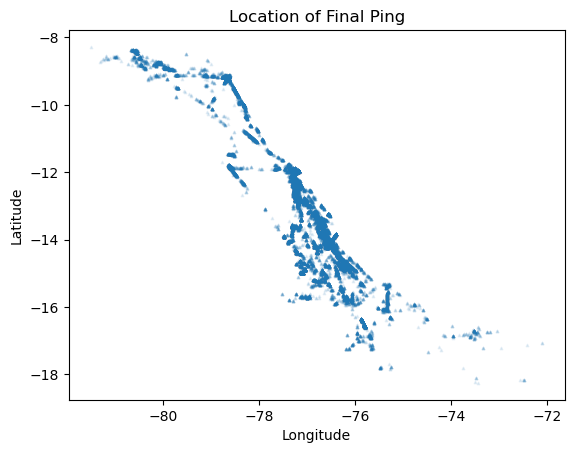

In [8]:
# Plot location at the final ping ('Lat_E', 'Lon_E')
plt.scatter(x=dt['Lon_E'], y=dt['Lat_E'], s=3, marker="^", alpha=0.1)
plt.xlabel ('Longitude')
plt.ylabel ('Latitude')
plt.title ('Location of Final Ping')
plt.show()

Text(0.5, 1.0, 'Location of Final Ping on the Coast of Peru')

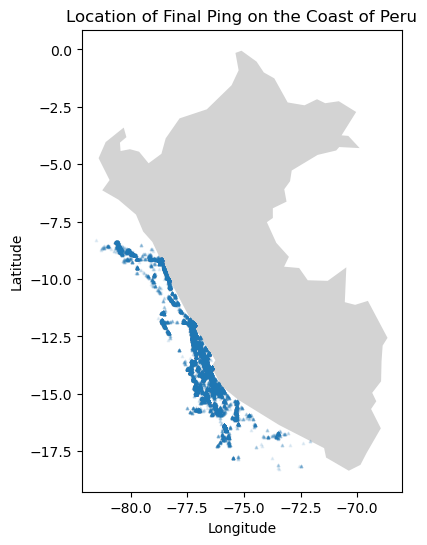

In [9]:
import geopandas as gpd

# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# load the low resolution world map
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
gdf = gpd.read_file(url)

# plot map of Peru
gdf[gdf["SOV_A3"] == "PER"].plot(color="lightgrey", ax=ax)
# Add location data 
dt.plot(x='Lon_E', y='Lat_E', kind="scatter", ax=ax, s=3, marker="^", alpha=0.1) 
# Add labels
plt.xlabel ('Longitude')
plt.ylabel ('Latitude')
plt.title ('Location of Final Ping on the Coast of Peru')

In [10]:
# set outlier measurement errors to NA
dt.loc[dt['NASC'] > 1000, 'NASC'] =  np.nan
dt.loc[dt['ABC'] > 0.001, 'ABC'] =  np.nan

# Most important predictors
dt[["Height_mean", "Depth_mean", "Sv_mean", "Sv_max", "Sv_min", "Sv_noise", "NASC", "ABC"]].describe()

,Height_mean,Depth_mean,Sv_mean,Sv_max,Sv_min,Sv_noise,NASC,ABC
count,27392.000000,27392.000000,27392.000000,27392.000000,27392.000000,27392.000000,23276.000000,2.690300e+04
mean,1.611526,34.877970,-160.970967,-151.590879,-167.704261,-980.418479,135.973242,2.497066e-05
std,2.417622,55.066196,297.059548,300.393569,294.553784,10.650949,201.697309,9.078669e-05
min,0.002306,0.725327,-999.000000,-999.000000,-999.000000,-1006.124041,0.000000,0.000000e+00
25%,0.494609,7.498035,-65.007585,-55.219006,-64.988363,-986.730548,5.866500,2.120000e-07
50%,0.787972,12.852724,-56.805446,-47.611876,-64.817348,-980.091839,45.333098,1.700000e-06
75%,1.644000,27.789329,-50.498772,-40.971255,-63.641564,-973.618896,175.995015,7.770000e-06
max,43.515127,315.094719,-7.530407,-0.253201,-42.212651,-941.014280,999.827347,9.970900e-04


array([[<Axes: xlabel='Height_mean', ylabel='Height_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_mean', ylabel='Height_mean'>,
        <Axes: xlabel='NASC', ylabel='Height_mean'>,
        <Axes: xlabel='ABC', ylabel='Height_mean'>],
       [<Axes: xlabel='Height_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='NASC', ylabel='Depth_mean'>,
        <Axes: xlabel='ABC', ylabel='Depth_mean'>],
       [<Axes: xlabel='Height_mean', ylabel='Sv_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Sv_mean'>,
        <Axes: xlabel='Sv_mean', ylabel='Sv_mean'>,
        <Axes: xlabel='NASC', ylabel='Sv_mean'>,
        <Axes: xlabel='ABC', ylabel='Sv_mean'>],
       [<Axes: xlabel='Height_mean', ylabel='NASC'>,
        <Axes: xlabel='Depth_mean', ylabel='NASC'>,
        <Axes: xlabel='Sv_mean', ylabel='NASC'>,
        <Axes: xlabel='NASC'

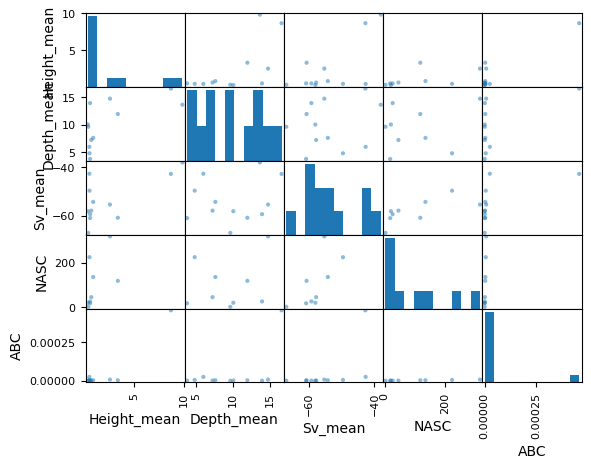

In [11]:
# Plot predictors of interest
dt3 = dt.loc[lambda dt: dt['Region_ID'] == 3] # Subset data for exploration purposes
pd.plotting.scatter_matrix(dt3[["Height_mean", "Depth_mean", "Sv_mean", "NASC","ABC"]]) # , "Sv_max", "Sv_min", "Sv_noise"

Text(0.5, 1.0, 'Average Shoal Height and Depth')

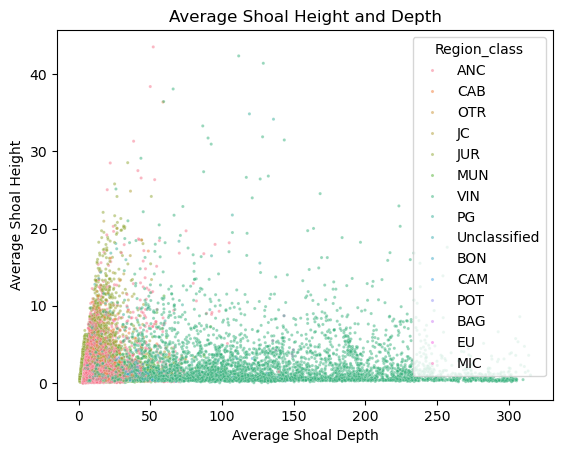

In [12]:
# Average Shoal Height and Depth 
sns.scatterplot(dt, y="Height_mean", x="Depth_mean", hue="Region_class", alpha=0.5, s=5)
plt.ylabel ('Average Shoal Height')
plt.xlabel ('Average Shoal Depth')
plt.title ('Average Shoal Height and Depth')

In [13]:
# Backscatter volume mean strength vs Nautical acoustic dispersion coefficient
#sns.scatterplot(dt, x="Sv_mean", y="NASC", alpha=0.5)# hue="Region_class",
#plt.ylabel ('Nautical acoustic dispersion coefficient')
#plt.xlabel ('Backscatter volume mean strength')

Text(0, 0.5, '')

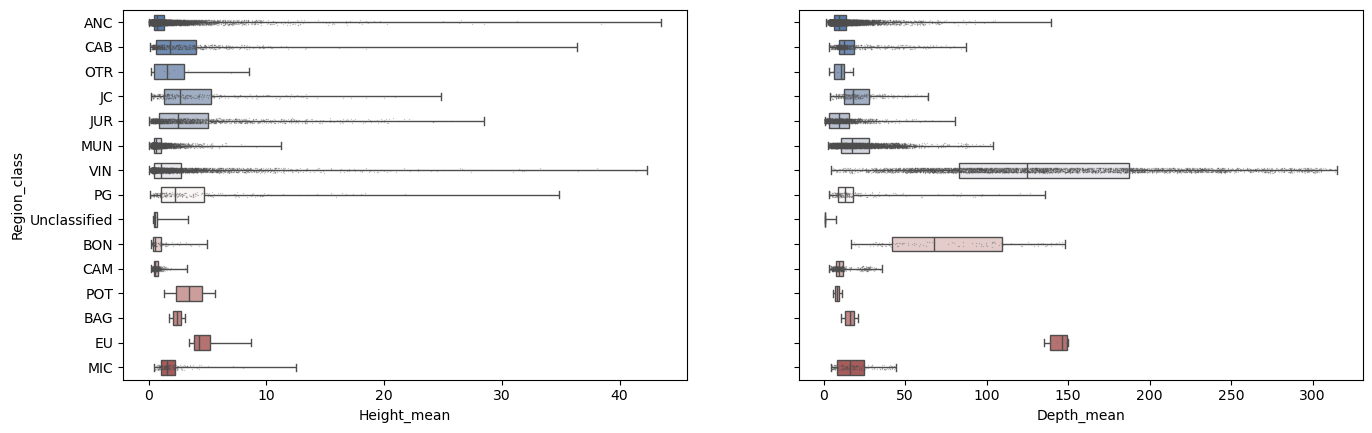

In [14]:
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(16)

sns.boxplot(data=dt, x="Height_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[0])
sns.stripplot(dt, x="Height_mean", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[0])
sns.boxplot(data=dt, x="Depth_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[1])
sns.stripplot(dt, x="Depth_mean", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[1])
axs[1].set_yticklabels([])
axs[1].set_ylabel('')

Text(0, 0.5, '')

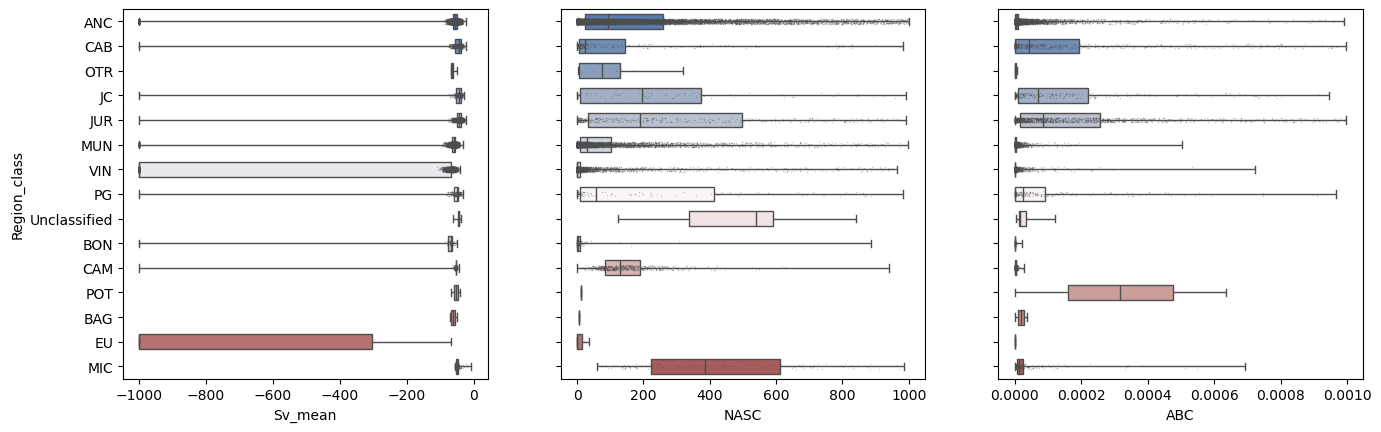

In [15]:
fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(16)

sns.boxplot(data=dt, x="Sv_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[0])
sns.stripplot(dt, x="Sv_mean", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[0])

sns.boxplot(data=dt, x="NASC", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[1])
sns.stripplot(dt, x="NASC", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[1])
#plt.xscale("log", ax=axs[1])
axs[1].set_yticklabels([])
axs[1].set_ylabel('')

sns.boxplot(data=dt, x="ABC", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6, ax=axs[2])
sns.stripplot(dt, x="ABC", y="Region_class", size=1, color=".3", alpha=0.3, ax=axs[2])
#plt.xscale("log", ax=axs[1])
axs[2].set_yticklabels([])
axs[2].set_ylabel('')

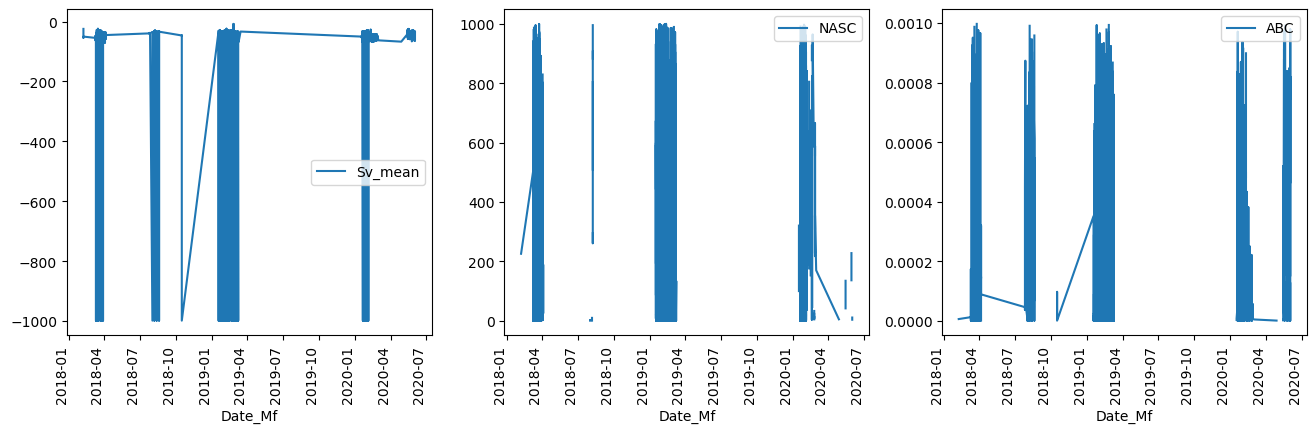

In [16]:
# Plot in terms of time of recording
dt['Date_Mf'] = pd.to_datetime(dt['Date_M'], format =  "%Y%m%d")
dtt = dt.sort_values('Date_Mf', ascending=True)

fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(16)

dtt.plot(x='Date_Mf', y='Sv_mean', rot='vertical', ax=axs[0]);
dtt.plot(x='Date_Mf', y='NASC', rot='vertical', ax=axs[1]);
dtt.plot(x='Date_Mf', y='ABC', rot='vertical', ax=axs[2]);

In [17]:
### Linear Modelling ############################################################################################

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
# Define response variable and split datasets
x = dt.drop('Height_mean', axis=1)
y = dt['Height_mean']
x_train, x_test, y_train, y_test = train_test_split(dropna(axis=0), y, test_size=0.2, random_state=42)

NameError: name 'dropna' is not defined

In [ ]:
# Fit a linear model using only the numeric features in the dataframe.
numeric_features = ["Depth_mean","Sv_min", "Sv_max", "Sv_noise", "Sv_mean","Lon_M", "Lat_M"]#, "NASC", "ABC", "Alpha", "Gain_constant", "Attack_angle"]
model1 = LinearRegression()
model1.fit(x_train[numeric_features], y_train)

# Output the coefficients
# Note that the intercept is not a part of .coef_ but is instead stored in .intercept_.
print(f"Model Coefficients: {model1.coef_}")
print(f"Model Intercept: {model1.intercept_}")

# Visualize crude measure of feature importance.
coefs = pd.DataFrame(model1.coef_, index=numeric_features, columns=['beta_value'])
sns.barplot(data=coefs.T, orient='h').set(title='Model Coefficients');

In [ ]:
# Report train and test R2 scores.
train_score = model1.score(x_train[numeric_features], y_train)
test_score = model1.score(x_test[numeric_features], y_test)
print('Train R2:', train_score)
print('Test R2:', test_score)

In [ ]:
# Make predictions
y_pred = model1.predict(x_test[numeric_features])

# Compute the MSE for the test data
mse = mean_squared_error(y_pred, y_test)
print(f"Mean Squared Error: {mse}")

In [ ]:
### Add categorical variable for species class
features = ["Region_class","Depth_mean", "Sv_mean","Sv_min", "Sv_max", "Sv_noise", "Lon_M", "Lat_M"]
# Create x train and test design matrices creating dummy variables for the categorical while keeping the numeric feature columns unchanged.
x_train2 = pd.get_dummies(x_train[features], drop_first=True)
x_test2 = pd.get_dummies(x_test[features], drop_first=True)
x_train2.head()

In [ ]:
# Fit a linear model using numeric features and species class in the dataframe.
model2 = LinearRegression()
model2.fit(x_train2, y_train)

# Output the coefficients
# Note that the intercept is not a part of .coef_ but is instead stored in .intercept_.
print(f"Model Coefficients: {model2.coef_}")
print(f"Model Intercept: {model2.intercept_}")

# Visualize crude measure of feature importance.
coefs2 = pd.DataFrame(model2.coef_, index=x_train2.columns, columns=['beta_value'])
sns.barplot(data=coefs2.T, orient='h').set(title='Model Coefficients');

In [ ]:
# Report train and test R2 scores.
train_score = model2.score(x_train2, y_train)
#test_score = model2.score(x_test2, y_test) <TODO>
print('Train R2:', train_score)
#print('Test R2:', test_score)

In [ ]:
### Regularization Methods ############################################################################################
#NEXT: cv / regularization with NASC, ABC etc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

# Create and fit an Elastic Net model
alpha = 0.5 # Regularization strength (adjust as needed)
l1_ratio = 0.5 # Mixing parameter (0.0 for L2, 1.0 for L1)
m3 = ElasticNet(alpha = alpha, l1_ratio = l1_ratio)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define model 
numeric_features = ["Depth_mean", "Sv_mean","Sv_min", "Sv_max", "Sv_noise", "Lon_M", "Lat_M"]# "Alpha","NASC", "ABC", "Gain_constant", "Attack_angle"]
# Evaluate model
scores = cross_val_score(m3, x_train[numeric_features], y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive and calculate mean absolute error
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))